In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(
    r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\sberbank_russian_housing_market\house-prices-advanced-regression-techniques\train.csv'
    )

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [36]:
X = df[['YearBuilt']]
y = df[['SalePrice']]

poly_features = PolynomialFeatures(degree=2, include_bias=False)

poly_X = poly_features.fit_transform(X)

model = LinearRegression()

model.fit(poly_X, y)

y_pred = model.predict(poly_X)

(1460, 2)

In [51]:
model_linear = LinearRegression()
model_linear.fit(X, y)
y_pred_linear = model_linear.predict(X)

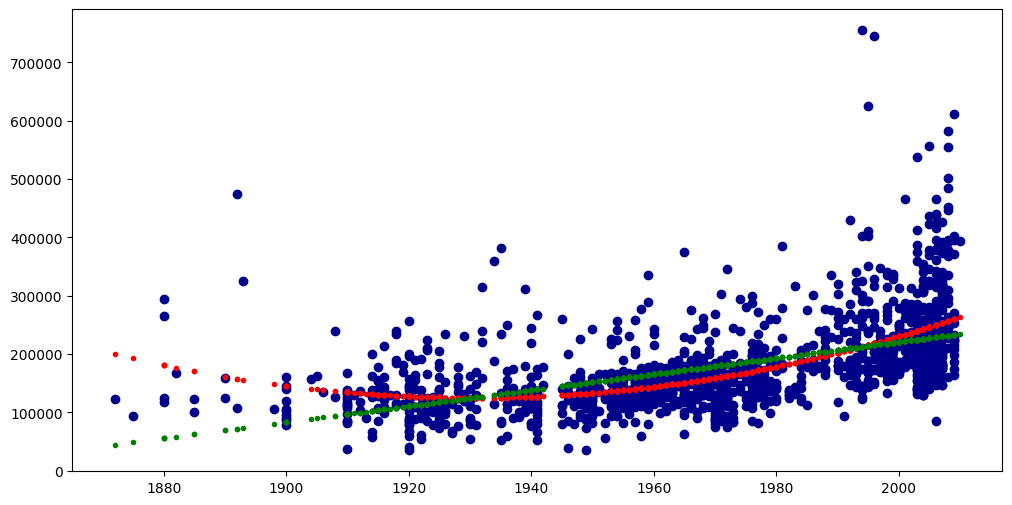

In [61]:
ax = plt.scatter(x=X, y=y, color='DarkBlue', marker='o')
ax = plt.scatter(X, y_pred, color='Red', marker='.')
ax = plt.scatter(X, y_pred_linear, color='Green', marker='.')
ax.figure.set_size_inches(12, 6)

In [103]:
font_features_bold = {'size': 16, 'color': 'Black', 'weight': 'bold', 'family': 'serif', 'stretch': 'normal', 'variant': 'normal'}
font_features_norm = {'size': 12, 'color': 'Black', 'weight': 'bold', 'family': 'serif', 'stretch': 'normal', 'variant': 'normal'}
font_features_small = {'size': 10, 'color': 'Black', 'weight': 'normal', 'family': 'serif', 'stretch': 'normal', 'variant': 'normal'}

C:\Users\jorda\AppData\Local\Temp\ipykernel_18196\4161093451.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.arange(0, 800000, 100000), fontdict=font_features_small)


[Text(0, -100000.0, '0'),
 Text(0, 0.0, '100000'),
 Text(0, 100000.0, '200000'),
 Text(0, 200000.0, '300000'),
 Text(0, 300000.0, '400000'),
 Text(0, 400000.0, '500000'),
 Text(0, 500000.0, '600000'),
 Text(0, 600000.0, '700000'),
 Text(0, 700000.0, ''),
 Text(0, 800000.0, '')]

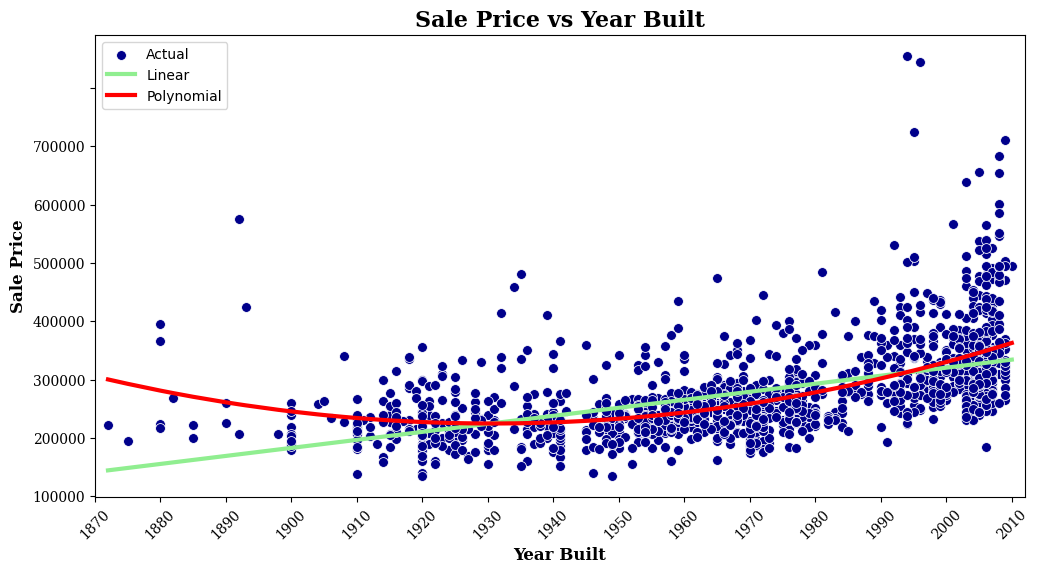

In [107]:
ax = sns.scatterplot(x=X['YearBuilt'], y=y['SalePrice'], color='DarkBlue', marker='o', s=50, legend=True, label='Actual')
ax = sns.lineplot(x=X['YearBuilt'], y=y_pred_linear.flatten(), color='LightGreen', linewidth=3, label='Linear', ax=ax)
ax = sns.lineplot(x=X['YearBuilt'], y=y_pred.flatten(), color='Red', linewidth=3, label='Polynomial', ax=ax)
ax.figure.set_size_inches(12, 6)
ax.set_title('Sale Price vs Year Built', fontdict=font_features_bold)
ax.set_xlabel('Year Built', fontdict=font_features_norm)
ax.set_ylabel('Sale Price', fontdict=font_features_norm)
ax.set_xlim(1870, 2012)
ax.set_xticks(np.arange(1870, 2012, 10))
ax.set_xticklabels(np.arange(1870, 2012, 10), rotation=45, fontdict=font_features_small)
ax.set_yticklabels(np.arange(0, 800000, 100000), fontdict=font_features_small)